In [2]:
from google.colab import files
files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


{'Churn_Modelling.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print("\nMissing values per column:")

df.isnull().sum()


Missing values per column:


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df = df.rename(columns={'Exited' : 'Churn'})
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print("\n Duplicated rows :",df.duplicated().sum())


 Duplicated rows : 0


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# ensuring correct data types

df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Churn'] = df['Churn'].astype(int)

In [11]:
# High-level EDA
print("\n================== Insights ==================")
total = len(df)
churn_rate = df["Churn"].mean()
print(f"Total customers: {total}")
print(f"Overall churn rate: {churn_rate:.2%}")

by_geo = df.groupby("Geography")["Churn"].mean().sort_values(ascending=False)
print("\nChurn rate by Geography :")
print(by_geo.apply(lambda x: f"{x:.2%}"))

by_gender = df.groupby("Gender")["Churn"].mean()
print("\nChurn rate by Gender:")
print(by_gender.apply(lambda x: f"{x:.2%}"))

by_active = df.groupby("IsActiveMember")["Churn"].mean().rename({0:"Inactive",1:"Active"})
print("\nChurn by Active Member (0=Inactive, 1=Active):")
print(by_active)

by_products = df.groupby("NumOfProducts")["Churn"].mean()
print("\nChurn by Number of Products:")
print(by_products.apply(lambda x: f"{x:.2%}"))




================== Insights ==================
Total customers: 10000
Overall churn rate: 20.37%

Churn rate by Geography :
Geography
Germany    32.44%
Spain      16.67%
France     16.15%
Name: Churn, dtype: object

Churn rate by Gender:
Gender
Female    25.07%
Male      16.46%
Name: Churn, dtype: object

Churn by Active Member (0=Inactive, 1=Active):
IsActiveMember
Inactive    0.268509
Active      0.142691
Name: Churn, dtype: float64

Churn by Number of Products:
NumOfProducts
1     27.71%
2      7.58%
3     82.71%
4    100.00%
Name: Churn, dtype: object


/tmp/ipython-input-1445846942.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_geo = df.groupby("Geography")["Churn"].mean().sort_values(ascending=False)
/tmp/ipython-input-1445846942.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_gender = df.groupby("Gender")["Churn"].mean()


In [16]:
df["BalanceToSalary"] = (df["Balance"] / (df["EstimatedSalary"] + 1e-9)).replace([np.inf, -np.inf], np.nan)


import plotly.express as px

fig = px.scatter(
    df,
    x="EstimatedSalary",
    y="Balance",
    color=df["Churn"].map({0:"Retained",1:"Churned"}),
    hover_data=["Geography","Gender","Age","NumOfProducts","IsActiveMember"],
    title="Interactive: Balance vs Estimated Salary (filter by churn status)",
    labels={"color":"Status"}
)

# Create buttons for filtering
buttons = []
for label in ["All","Retained","Churned"]:
    if label == "All":
        visible = [True] * len(fig.data)
    else:
        visible = [trace.name == label for trace in fig.data]
    buttons.append(dict(
        label=label,
        method="update",
        args=[{"visible": visible}]
    ))

fig.update_layout(
    updatemenus=[dict(type="dropdown", x=1.15, y=1.2, buttons=buttons, showactive=True)],
    legend_title_text="Status",
    margin=dict(l=40,r=40,b=40,t=60)
)
fig.show()

# box comparison with dropdown feature & churn filter

features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "BalanceToSalary"]
default_feature = "CreditScore"

fig2 = px.box(
    df,
    x=df["Churn"].map({0:"Retained",1:"Churned"}),
    y=default_feature,
    color=df["Churn"].map({0:"Retained",1:"Churned"}),
    title=f"Interactive: Compare feature by Churn (feature = {default_feature})",
    labels={"x":"Status", "y": default_feature},
)

# Build dropdown to switch y feature
dropdown_buttons = []
for feat in features:
    dropdown_buttons.append(
        dict(
            label=feat,
            method="update",
            args=[
                {"y": [df[feat]]},  # data update
                {"yaxis": {"title": feat}, "title": f"Interactive: Compare feature by Churn (feature = {feat})"}
            ]
        )
    )

fig2.update_layout(
    updatemenus=[dict(type="dropdown", x=1.15, y=1, buttons=dropdown_buttons, showactive=True)],
    xaxis_title="Status",
    yaxis_title=default_feature,
    showlegend=False,
    margin=dict(l=40,r=40,b=40,t=60)
)
fig2.show()


/tmp/ipython-input-17592433.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-17592433.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




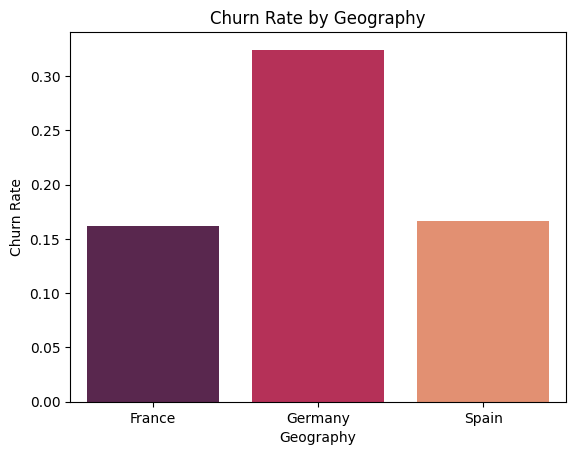

In [17]:
sns.barplot(x=df['Geography'],y=df['Churn'],ci=None,palette='rocket')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Geography')
plt.show()

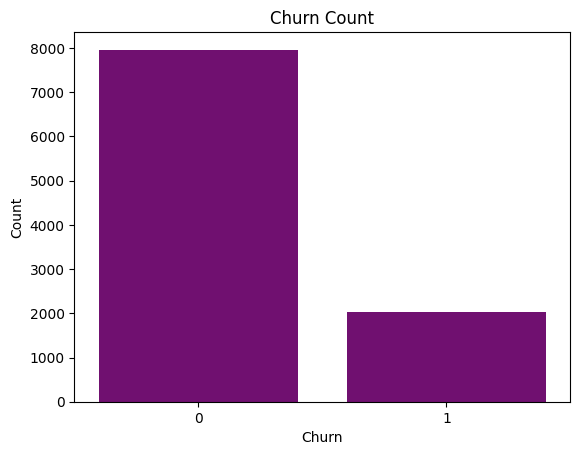

In [18]:
sns.countplot(x=df['Churn'],color='purple')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')
plt.show()

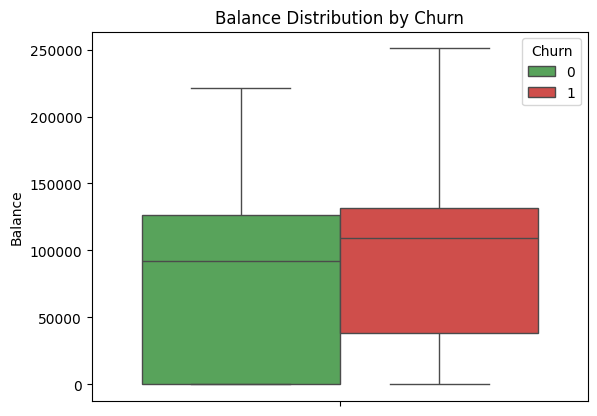

In [19]:
sns.boxplot(df, y="Balance", hue="Churn", palette=["#4caf50","#e53935"])
plt.title("Balance Distribution by Churn")
plt.show()


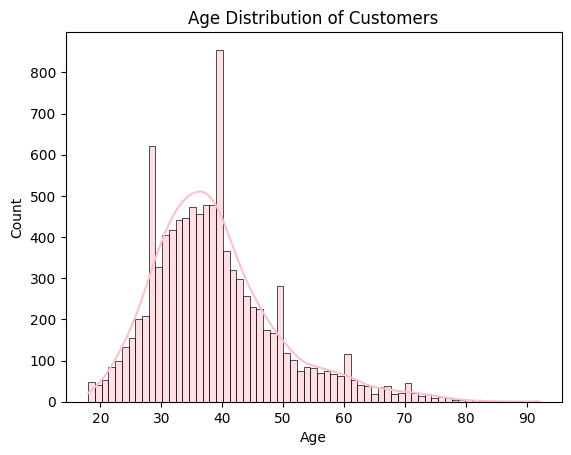

In [20]:
sns.histplot(x='Age',data=df,color='pink',kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

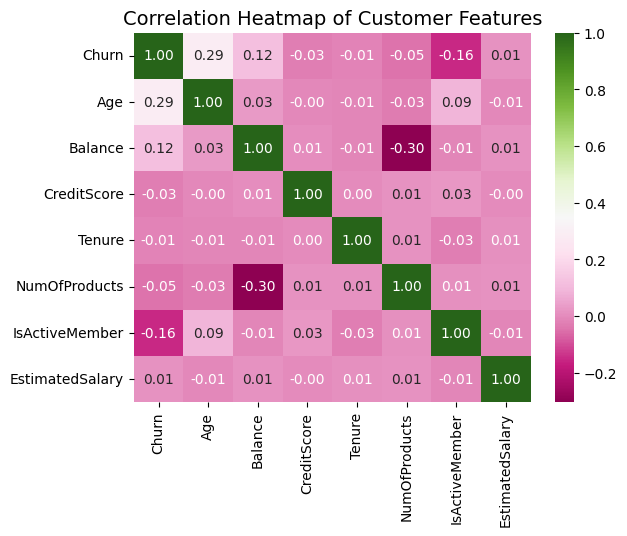

In [21]:
important_cols = ["Churn","Age","Balance","CreditScore","Tenure",
                  "NumOfProducts","IsActiveMember","EstimatedSalary"]
corr = df[important_cols].corr()
# plot heatmap

sns.heatmap(corr, cmap="PiYG", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Customer Features", fontsize=14)
plt.show()

## Insights
Month-to-month contracts, high monthly charges, and electronic check payments show the highest churn.

Longer tenure and bundled services strongly reduce churn risk.

Contract type, tenure, and payment method are the top predictors in the model.